In [84]:
# Definindo fun,c~ao com shs fixos
def g1(*shs):
    def g2(x, *hescns):
        pcompl = np.array([])
        ng = int( len(hescns) / 2)
        for i in range(ng):
            pcompl = np.append(pcompl, (shs[i], hescns[2*i+0], hescns[2*i+1]))
        return gaussian(x,*pcompl)
    return g2

In [85]:
xs2 = np.linspace(11.0, 19.0)
ys2 = gaussian(xs2, 1.1, 150.0, 13.0, 0.9, 200.0, 17.1)
# ..................sh1..he1... cn1...sh2..he2...cn2 .
rs = 7.0 * np.random.normal(size=xs2.size)
yrs2 = ys2 + rs

In [86]:
gausinipars_test = (130.0, 12.0, 210.0, 16.0)
popt_gauss_test, pcov_gauss_test = curve_fit(g1(1.1, 0.9),xs2,yrs2,p0=gausinipars_test)
popt_gauss_test

array([150.00921794,  12.98857325, 203.03461519,  17.09590188])

In [87]:
multis[3]

[380, 385, 392, 403]

In [88]:
regions[3]

[367, 416]

In [89]:
ipks = [i-regions[3][0] for i in multis[3]]
ipks

[13, 18, 25, 36]

In [90]:
multi_heis = [nety[3][ipk] for ipk in ipks]
multi_heis    

[13522.237975840148, 771.5322964733796, 21589.354331990227, 1828.1404164397723]

In [91]:
inipars = [[0.15, i2,i3] for i2,i3 in zip(multi_heis, multis[3])]
inipars

[[0.15, 13522.237975840148, 380],
 [0.15, 771.5322964733796, 385],
 [0.15, 21589.354331990227, 392],
 [0.15, 1828.1404164397723, 403]]

In [92]:
# inipars = [inipars[0], inipars[2], inipars[3]]

In [93]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [94]:
iniflat = flatten(inipars)
iniflat

[0.15,
 13522.237975840148,
 380,
 0.15,
 771.5322964733796,
 385,
 0.15,
 21589.354331990227,
 392,
 0.15,
 1828.1404164397723,
 403]

In [95]:
lx_nonegat = []
nety_nonegat = []
sigma_nety = []
for i in range(len(lx[3])):
    if nety[3][i] > 0.0:
        lx_nonegat.append(lx[3][i])
        nety_nonegat.append(nety[3][i])
        sigma_nety.append(np.sqrt(nety[3][i]))
# (lx_nonegat,nety_nonegat,sigma_nety)

In [96]:
def no_negats(i, lx, nety):
    lx_nonegat = []
    nety_nonegat = []
    sigma_nety = []
    for j in range(len(lx[i])):
        if nety[i][j] > 0.0:
            lx_nonegat.append(lx[i][j])
            nety_nonegat.append(nety[i][j])
            sigma_nety.append(np.sqrt(nety[i][j]))
    return lx_nonegat, nety_nonegat, sigma_nety

In [97]:
iniflat

[0.15,
 13522.237975840148,
 380,
 0.15,
 771.5322964733796,
 385,
 0.15,
 21589.354331990227,
 392,
 0.15,
 1828.1404164397723,
 403]

In [98]:
# iniflat = [0.15, 13522.237975840148, 379, 0.15, 21589.354331990227, 391, 0.15, 1828.1404164397723, 402]
# iniflat

In [99]:
popt_gauss1, pcov_gauss1 = curve_fit(gaussian, lx_nonegat, nety_nonegat, sigma=sigma_nety, p0=iniflat)
popt_gauss1

array([1.38796876e-01, 1.37114609e+04, 3.79459118e+02, 2.48952619e-03,
       2.81648298e+02, 3.93870544e+02, 1.38482357e-01, 2.42970894e+04,
       3.90984390e+02, 1.85534915e-01, 1.93478536e+03, 4.02044490e+02])

In [100]:
yfitted = gaussian(lx[3], *popt_gauss1)

In [101]:
first_general_fit = []
for i in range(len(multis)):
    print(i)
    ipks = [j-regions[i][0] for j in multis[i]]
    multi_heis = [nety[i][ipk] for ipk in ipks]
    inipars = [[0.15, i2,i3] for i2,i3 in zip(multi_heis, multis[i])]
    iniflat = flatten(inipars)
    #if len(lx_nonegat) < 3:
    #    print('Error: few points to fit.')
    #    break
    lx_nonegat, nety_nonegat, sigma_nety = no_negats(i, lx, nety)
    len_lx_nonegat = len(lx_nonegat)
    print('Length of lx_nonegat: ', len_lx_nonegat)
    fittd = True
    if len_lx_nonegat < 4:
        print('Error: few points to fit.')
        fittd = False
    else:
        try:
            popt_gauss1, pcov_gauss1 = curve_fit(gaussian, lx_nonegat, nety_nonegat, sigma=sigma_nety, p0=iniflat)
        except RuntimeError:
            fittd = False
            print("Error: curve_fit failed.")
        if fittd:
            print(popt_gauss1)
            if np.inf in pcov_gauss1:
                print('Matriz de covariancia ruim.')
            else:
                print('Ajuste Ok.')
                first_general_fit.append( [lx_nonegat, nety_nonegat, popt_gauss1, pcov_gauss1] )
    print('-----------------------------')

0
Length of lx_nonegat:  48
[7.39336434e-02 3.33151836e+02 1.18965901e+02 9.48847016e-01
 1.23839020e+02 1.33581478e+02]
Ajuste Ok.
-----------------------------
1
Length of lx_nonegat:  20
[1.62236672e-01 3.19292723e+03 2.36359649e+02]
Ajuste Ok.
-----------------------------
2
Length of lx_nonegat:  19
[1.76356769e-01 2.24928358e+03 2.70260142e+02]
Ajuste Ok.
-----------------------------
3
Length of lx_nonegat:  46
[1.38796876e-01 1.37114609e+04 3.79459118e+02 2.48952619e-03
 2.81648298e+02 3.93870544e+02 1.38482357e-01 2.42970894e+04
 3.90984390e+02 1.85534915e-01 1.93478536e+03 4.02044490e+02]
Ajuste Ok.
-----------------------------
4
Length of lx_nonegat:  28
[9.83782025e-02 6.52063375e+03 4.42055966e+02 2.92753627e-01
 1.09829519e+03 4.53547264e+02 1.74919148e-01 2.23285546e+03
 4.56246863e+02]
Ajuste Ok.
-----------------------------
5
Length of lx_nonegat:  12
[4.37794284e-01 5.96017677e+01 7.04660578e+02]
Ajuste Ok.
-----------------------------
6
Length of lx_nonegat:  13
[

C:\Users\mmaduar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\mmaduar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
C:\Users\mmaduar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[5.57936968e-02 3.18154208e+01 1.18593875e+03 1.32983740e-01
 1.03215353e+03 1.20853807e+03 1.04060310e-01 8.06310596e+03
 1.22558659e+03]
Ajuste Ok.
-----------------------------
9
Length of lx_nonegat:  15
[9.92146621e-02 5.15981635e+02 1.31123119e+03]
Ajuste Ok.
-----------------------------
10
Length of lx_nonegat:  17
[5.72223553e-02 3.01651850e+02 1.39078814e+03]
Ajuste Ok.
-----------------------------
11
Length of lx_nonegat:  20
[9.67980767e-02 1.63401752e+04 1.49492521e+03]
Ajuste Ok.
-----------------------------
12
Length of lx_nonegat:  3
Error: few points to fit.
-----------------------------
13
Length of lx_nonegat:  19
[8.80566343e-02 2.51666074e+04 1.78196118e+03]
Ajuste Ok.
-----------------------------
14
Length of lx_nonegat:  45
[ 7.56275015e-02  1.42894851e+02  1.95834967e+03  1.52501399e-01
  2.52637337e+02  1.96897224e+03  3.14766530e-01  3.02803066e+01
  1.99784044e+03  4.67527270e+00 -4.86306688e+01  2.01334936e+03
  3.78610878e-02  3.07590625e+01  2.00937697e

In [85]:
sqrt_2ln2 = np.sqrt(2*np.log(2))
fwhms_derived = sqrt_2ln2 * np.array(list_sharps) ** -0.5
channs = np.array(list_channs)
unc_fwhms_derived = np.array(list_unc_sharps) * 0.5 * np.array(list_sharps) ** -1.5
channs, fwhms_derived, unc_fwhms_derived

(array([ 236.3596495 ,  270.2601425 ,  379.46517235,  391.58034091,
         402.06394756,  943.30201141, 1208.55046563, 1225.58659712,
        1311.23118461, 1390.78814885, 1494.925212  , 1781.96117926,
        1958.34962702, 1968.96406499, 2302.83454962, 2339.70262204,
        2432.25633332, 2464.75520773, 2585.72735811, 2938.01171489,
        3085.39962209, 3891.45022213, 3980.15564139, 4019.23014145,
        4083.03106483, 4157.61150518, 4248.96751754, 4884.01779504,
        4908.59096514, 5676.21276905, 5851.21951259, 6273.12272956,
        6980.4765712 , 7019.68545405, 7795.23498899, 8024.02168074,
        8078.18623285]),
 array([2.92316422, 2.80370077, 3.16036965, 3.16395651, 2.73347374,
        3.75386186, 3.43631559, 3.22870568, 3.64993533, 3.73800433,
        4.92203689, 3.78437674, 3.96777181, 3.01502428, 4.03255574,
        9.92890156, 4.43967463, 4.86967306, 5.37306467, 6.22046008,
        4.99738696, 5.52583022, 5.81183168, 6.41035754, 6.22331234,
        7.46513686, 7.6

In [360]:
coeff_fwhm_fit, covar_fwhm_fit = np.polyfit(channs, fwhms, deg=2, w=unc_fwhms**-2 , cov=True)
poly1 = np.poly1d(coeff_fwhm_fit)
coeff_fwhm_fit, covar_fwhm_fit, poly1(1000)

(array([3.02380575e-08, 5.34825262e-04, 2.92596342e+00]),
 array([[ 1.92213962e-16, -8.78457916e-13,  8.98397348e-10],
        [-8.78457916e-13,  4.12839484e-09, -4.37039692e-06],
        [ 8.98397348e-10, -4.37039692e-06,  4.87679757e-03]]),
 3.491026738841133)

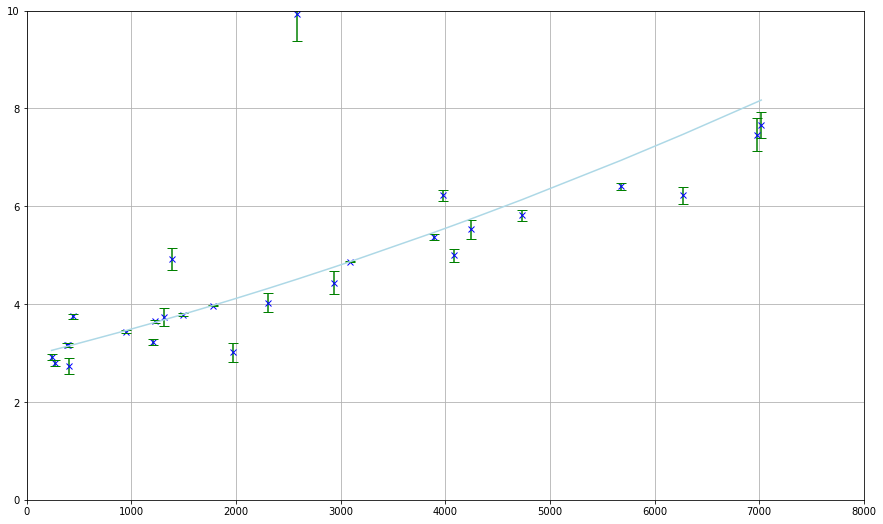

In [363]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(0, 8000)
ax1.set_ylim(0.0, 10.0)
dummy = ax1.plot(channs, fwhms, marker='x', color='blue', linestyle='None')
dummy = ax1.errorbar(channs, fwhms, yerr=unc_fwhms, capsize=5.0, color='green', linestyle='None')
dummy = ax1.plot(channs, poly1(channs), color='lightblue')